In [1]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "

# Please structure code as follows: 
# always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)

#import pandas and numpy
import pandas as pd
import numpy as np

#Attempt to import data from csv file to create a dataframe
automobile_p = 'Automobile.csv'
automobile = pd.read_csv(automobile_p, sep='#', decimal='.', header=None, names=['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'])

#Display data types of the imported dataframe
automobile.dtypes

#Strip redundant whitespaces
def strip_obj(col):
    if col.dtypes == object:
        return (col.astype(str)
                   .str.strip()
                   .replace({'nan': np.nan}))
    return col

automobile = automobile.apply(strip_obj, axis=0)

#Check value of each and every column and fix any errors found.

#Symboling column
automobile['symboling'].value_counts()
#Symboling ranges from -3 to 3. There are three "4" values in the columns and no "-3" values
#There might be 
automobile['symboling'].replace(4, -3, inplace=True)

#Normalized-losses column
automobile['normalized-losses'].value_counts()
#Check null values
automobile['normalized-losses'].isnull()
#Full null values with mean values
automobile['normalized-losses'].fillna(automobile['normalized-losses'].mean(axis=0), inplace=True)
#Floor values
automobile['normalized-losses'] = automobile['normalized-losses'].apply(np.floor)

#Make column
automobile['make'].value_counts()
#Remove capital letter mismatches
automobile['make'] = automobile['make'].str.lower()
#Fix typos
automobile['make'].replace("vol00112ov","volvo",inplace=True)

#Fuel-type column
automobile['fuel-type'].value_counts()
#Remove capital mismatches
automobile['fuel-type'] = automobile['fuel-type'].str.lower()

#Aspiration column
automobile['aspiration'].value_counts()
#Fix typos
automobile['aspiration'].replace("turrrrbo","turbo",inplace=True)
automobile['aspiration'].replace("Std","std",inplace=True)

#num-of-doors column
automobile['num-of-doors'].value_counts()
#Fix typos
automobile['num-of-doors'].replace("fourR","four",inplace=True)
automobile['num-of-doors'].replace("Four","four",inplace=True)

#body-style column
automobile['body-style'].value_counts()
#Remove capital mismatches
automobile['body-style'] = automobile['body-style'].str.lower()


#drive-wheels column
automobile['drive-wheels'].value_counts()
#Fix typos
automobile['drive-wheels'].replace("4wd","rwd",inplace=True)
automobile['drive-wheels'].replace("Fwd","fwd",inplace=True)

#engine-location column
automobile['engine-location'].value_counts()
#Remove capital mismatches
automobile['engine-location'] = automobile['engine-location'].str.lower()

#wheel-base column
automobile['wheel-base'].value_counts()
#check for null values
automobile['wheel-base'][automobile['wheel-base'].isnull()]

#length colum
automobile['length'].value_counts()
#check for null values
automobile['length'][automobile['length'].isnull()]

#height column
automobile['height'].value_counts()
#check for null values
automobile['height'][automobile['height'].isnull()]

#curb-weight column
automobile['curb-weight'].value_counts()
#check for null values
automobile['curb-weight'][automobile['curb-weight'].isnull()]

#engine-type column
automobile['engine-type'].value_counts()
#Remove capital mismatches
automobile['engine-type'] = automobile['engine-type'].str.lower()
#Fix Typos
automobile['engine-type'].replace("dohcv","dohc",inplace=True)

#num-of-cylinders column
automobile['num-of-cylinders'].value_counts()
#Remove capital mismatches
automobile['num-of-cylinders'] = automobile['num-of-cylinders'].str.lower()

#engine-size column
automobile['engine-size'].value_counts()
#check for null values
automobile['engine-size'][automobile['engine-size'].isnull()]

#fuel-system column
automobile['fuel-system'].value_counts()
#Remove capital mismatches
automobile['fuel-system'] = automobile['fuel-system'].str.lower()
#fix typos
automobile['fuel-system'].replace("mfi","mpfi",inplace=True)
automobile['fuel-system'].replace("spfi","spdi",inplace=True)

#bore column
automobile['bore'].value_counts()
#check for null value and fill null values with mean values
automobile['bore'][automobile['bore'].isnull()]
automobile['bore'].fillna(automobile['bore'].mean(axis=0),inplace=True)
#round values
automobile['bore'] = automobile['bore'].round(decimals=2)

#stroke column
automobile['stroke'].value_counts()
#check for null values and fill with mean values
automobile['stroke'][automobile['stroke'].isnull()]

automobile['stroke'].fillna(automobile['stroke'].mean(axis=0),inplace=True)

#round values
automobile['stroke'] = automobile['stroke'].round(decimals=2)

#compression-ratio column
automobile['compression-ratio'].value_counts()

#horsepower column
automobile['horsepower'].value_counts()
#check for null values and fill with mean values
automobile['horsepower'][automobile['horsepower'].isnull()]
automobile['horsepower'].fillna(automobile['horsepower'].mean(axis=0),inplace=True)
#floor values
automobile['horsepower'] = automobile['horsepower'].apply(np.floor)

#peak-rpm column
automobile['peak-rpm'].value_counts()
#check for null values and fill null with mean values
automobile['peak-rpm'][automobile['peak-rpm'].isnull()]
automobile['peak-rpm'].fillna(automobile['peak-rpm'].mean(axis=0),inplace=True)
#floor value
automobile['peak-rpm'] = automobile['peak-rpm'].apply(np.floor)

#city-mpg column
automobile['city-mpg'].value_counts()

#highway-mpg column
automobile['highway-mpg'].value_counts()

#price column
automobile['price'].value_counts()
#check for null values and fill null with mean values
automobile['price'].replace(0.0,np.nan,inplace=True)
automobile['price'][automobile['price'].isnull()]
automobile['price'].fillna(automobile['price'].mean(axis=0),inplace=True)
#floor values
automobile['price'] = automobile['price'].apply(np.floor)

In [2]:
# Task 2: Data Exploration
# 1. Choose 1 column with nominal values, 1 column with ordinal Values, and 1 column with numerical values


#Code goes after this line
#import matplotlib
import matplotlib.pyplot as plt

#visualisation for fuel-type column
automobile['fuel-type'].value_counts().plot(kind='pie',autopct='%.2f')
plt.title('Automobile - Fuel Type')
plt.show()

#visualisation for price column
automobile['price'].plot(kind='density')
plt.title('Automobile - Price')
plt.xlabel('Price')
plt.show()

#visualisation for make column
automobile['make'].value_counts().plot(kind='bar',
                                    figsize=(14,10),
                                    title="Automobile - Make")
plt.xlabel("Make Names")
plt.ylabel("Number of cars")
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

<Figure size 1400x1000 with 1 Axes>

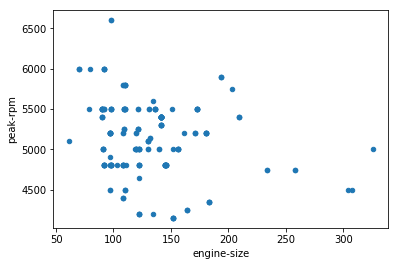

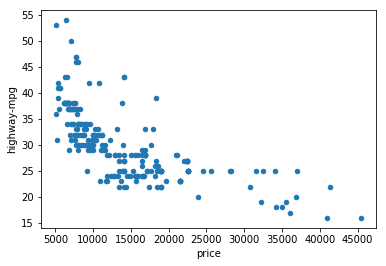

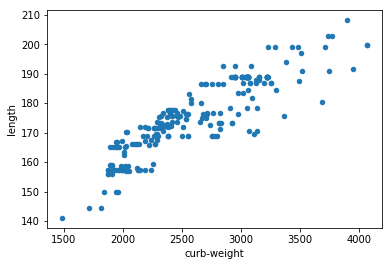

In [3]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line

#Relationship between engine-size and peak-rpm
automobile[['engine-size','peak-rpm']].plot(kind='scatter',x=0,y=1)
plt.show()

#Relationship between price and highway-mpg
automobile[['price','highway-mpg']].plot(kind='scatter',x=0,y=1)
plt.show()

#Relationship between curb-weight and length
automobile[['curb-weight','length']].plot(kind='scatter',x=0,y=1)
plt.show()




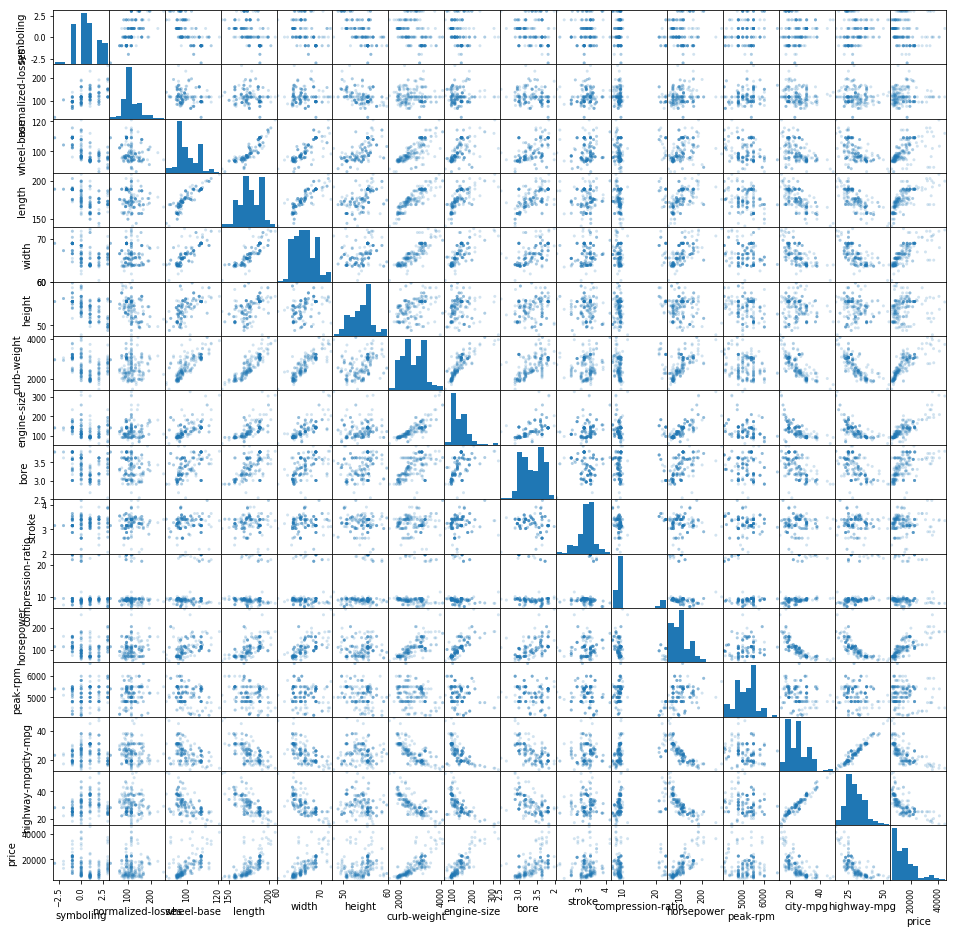

In [4]:
# Task 2: Data Exploration
# 3. Scatter matrix for all numerical columns

#Code goes after this line

#import scatter_matrix library
from pandas.plotting import scatter_matrix
#scatter_matrix
scatter_matrix(automobile,alpha=0.2,figsize=(16,16),diagonal='hist')
plt.show()